In [42]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 10)

from importlib import reload

import sys
sys.path.append('.')
import lib as l

In [44]:
reload(l)
data = l.load()

In [7]:
dgs = data['generics']
print("CRAWL INFO:\n- {} crawls\n- From {} to {} ({})\n- {} errors".format(
    dgs['crawl_nb'],
    dgs['crawl_from'],
    dgs['crawl_to'],
    dgs['crawl_frame'],
    dgs['crawl_err_nb'])
)

CRAWL INFO:
- 724 crawls
- From 2017-05-18 09:28:00 to 2017-06-17 12:28:00 (30 days 03:00:00)
- 11 errors


In [45]:
# Erros
l.error_info(data['crawl'])


[227] 2017-05-27 19:28:00 :: 2 errs
- [https://www.operadeparis.fr/saison-16-17/ballet/robbins-balanchine-cherkaoui-jalet] Url #: Unable to parse date sale string "
- url is not defined

[228] 2017-05-27 20:28:00 :: 2 errs
- [https://www.operadeparis.fr/saison-16-17/ballet/robbins-balanchine-cherkaoui-jalet] Url #: Unable to parse date sale string "
- url is not defined

[229] 2017-05-27 21:28:00 :: 2 errs
- [https://www.operadeparis.fr/saison-16-17/ballet/robbins-balanchine-cherkaoui-jalet] Url #: Unable to parse date sale string "
- url is not defined

[230] 2017-05-27 22:28:00 :: 2 errs
- [https://www.operadeparis.fr/saison-16-17/ballet/robbins-balanchine-cherkaoui-jalet] Url #: Unable to parse date sale string "
- url is not defined

[231] 2017-05-27 23:28:00 :: 2 errs
- [https://www.operadeparis.fr/saison-16-17/ballet/robbins-balanchine-cherkaoui-jalet] Url #: Unable to parse date sale string "
- url is not defined

[293] 2017-05-30 13:28:00 :: 1 errs
- SQLITE_BUSY: database is l

### Are the prices per category fixed for a given performance ?

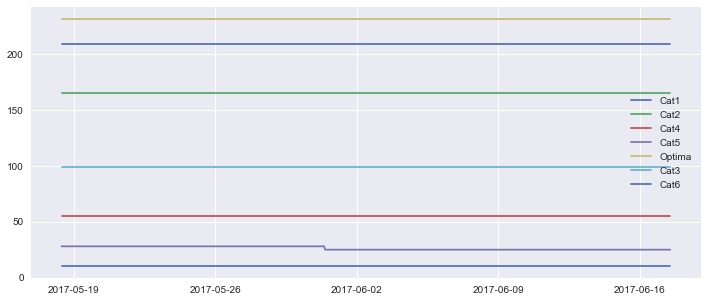

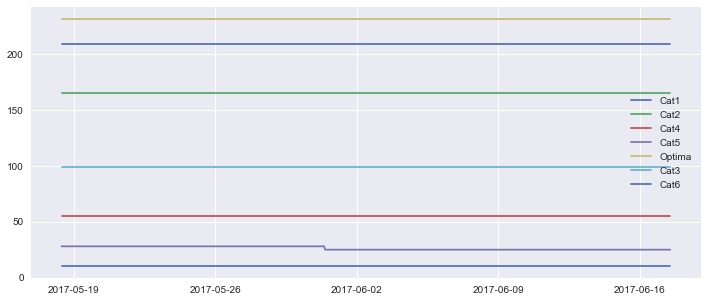

In [6]:
# Display fns
def perf_prices_ts(data, perf_id):
    prs = data['price'][data['price'].performanceId == perf_id]
    plt.figure(figsize=(12,5))
    for cat in prs.category.unique():
        d = prs[prs.category == cat]
        plt.plot(d.crawl_startTime, d.price, label=cat)
        
    plt.legend()
    plt.show()

perf_prices_ts(data, 71)
perf_prices_ts(data, 76)

### Are available categories for a show fixed ?
- for a given perf, always the same categs ? => get categories per performance.
- for a given show, always same categs accross performances ? => get categories per show.

### Prices Vs performance date

In [ ]:


def show_pricings(data, show_id):
    # List perfs
    show_perfs = data['performance'][data['performance'].showId == show_id]
    # Get categs for show (from 1st perf)
    fpid = show_perfs.iloc[0].id
    cats = data['performance_prices'][data['performance_prices'].performanceId == fpid].category.values
    
    show = data['show'][data['show'].id == show_id].iloc[0]

    for cat in cats:
        tmp = pd.merge(show_perfs, data['performance_prices'][data['performance_prices']['category'] == cat], left_on='id', right_on='performanceId', how='left')
        plt.plot(tmp.date.apply(lambda x: x.timestamp()), tmp.price, 'o--',label=cat)
        plt.xticks(tmp.date.apply(lambda x: x.timestamp()), tmp.date.apply(lambda d: d.strftime("%a %-d/%-m")), rotation='vertical')
    plt.legend()
    plt.show()

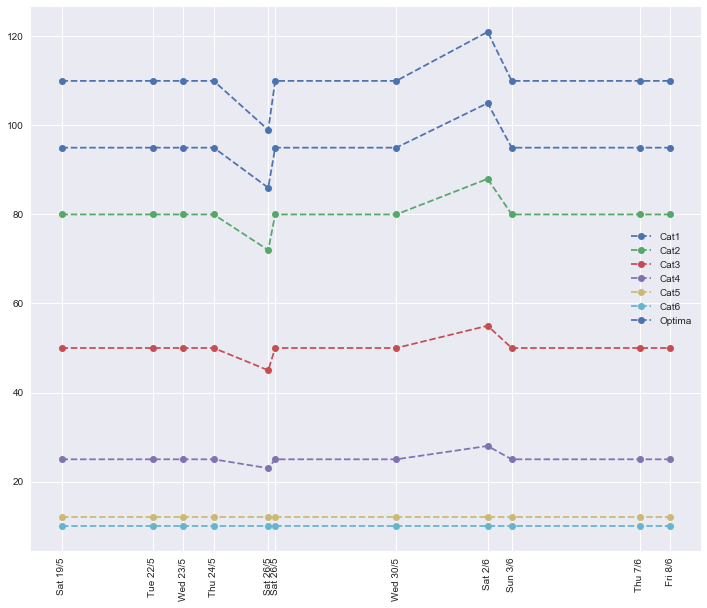

In [83]:
perf_prices_per_date(data, 31)

Questions :
- Prix constants par représentation et par catégorie
- Distribution des prix par jour de la semaine
    - single show: plot prices as function of weekday
    - do stats for all opera/ballet shows
 
 

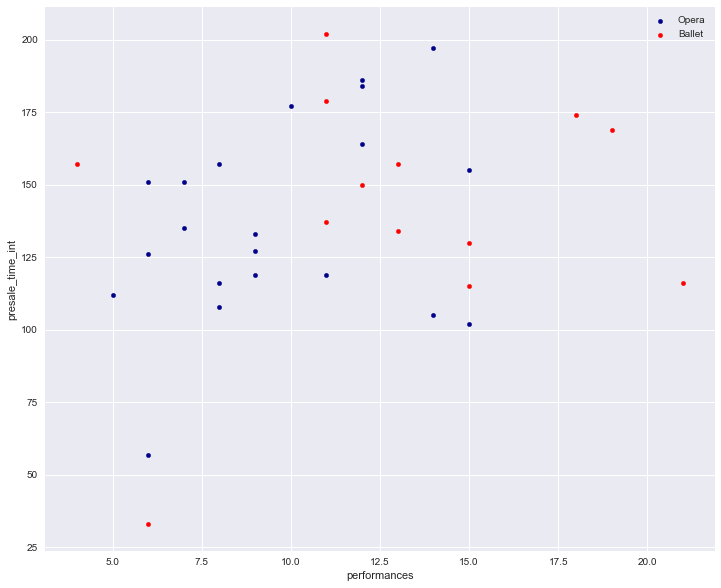

In [45]:
s17opera['presale_time_int'] = s17opera.presale_time.apply(lambda x: x.days)
s17ballet['presale_time_int'] = s17ballet.presale_time.apply(lambda x: x.days)
ax = s17opera.plot.scatter(x='performances', y='presale_time_int', color='DarkBlue', label='Opera');
s17ballet.plot.scatter(x='performances', y='presale_time_int', color='Red', label='Ballet', ax=ax);

# Sans rapport vraiment. avec le nombre de performances ...

### Cheapest TSs

- Afficher TS des prix les moins chers
- + date de mise en vente des billets
- + dates des différentes performances
- pouvoir zoomer lers dernière semaine, dernières 2 semaines, ...



In [46]:
def plot_cheapest(data, show_id):
    show = data['show'].loc[show_id]
    perfs = data['performance'][data['performance'].showId == show_id]
    ts = data['show_cheapest'].loc[show_id]
    
    plt.figure(figsize=(18,10))
    
    l.show_info(data, show_id)
    ts.plot()
    plt.title('Cheapest prices for "{}"'.format(show.title))
    plt.ylabel('Price')
    plt.xlabel('crawl time')
    
    max_y = ts.max()
    
    def event_visible(event_time):
        return event_time >= ts.index.min().to_pydatetime() and event_time <= ts.index.max().to_pydatetime()
    
    if show.saleStartDate is not None:
        dd = dt.datetime(show.saleStartDate.year, show.saleStartDate.month, show.saleStartDate.day, 9, 0, 0)
        if event_visible(dd): plt.axvline(show.saleStartDate,0, max_y, c='g')
        
    for p_dt in perfs.date:
        if not event_visible(p_dt.to_pydatetime()): continue
        plt.axvline(p_dt,0, max_y, c='r')
        
    plt.show();

[02] opera | rigoletto, Giuseppe Verdi, bastille (2017-05-27 to 2017-06-27, 11 perfs)
     Cats: Cat1,Cat10,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Optima
     Performances:
       [019] Sat, 2017-05-27 19:30:00
       [010] Tue, 2017-05-30 19:30:00
       [011] Fri, 2017-06-02 19:30:00
       [012] Mon, 2017-06-05 14:30:00
       [013] Fri, 2017-06-09 19:30:00
       [014] Mon, 2017-06-12 19:30:00
       [020] Thu, 2017-06-15 20:30:00
       [015] Sun, 2017-06-18 14:30:00
       [016] Wed, 2017-06-21 19:30:00
       [017] Sat, 2017-06-24 19:30:00
       [018] Tue, 2017-06-27 19:30:00


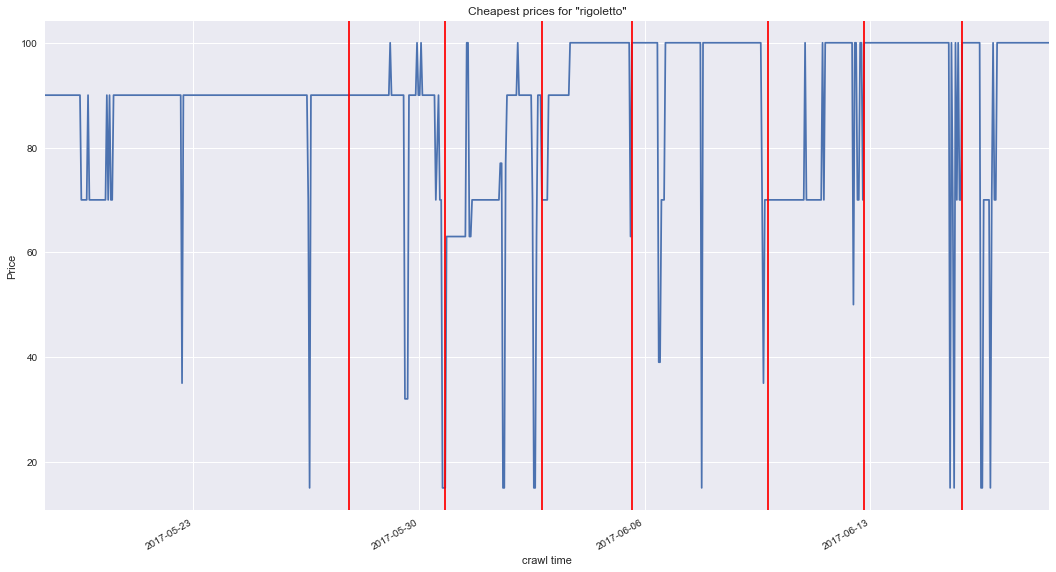

[21] opera | Carmen, Georges Bizet, bastille (2017-03-07 to 2017-07-16, 12 perfs)
     Cats: Cat1,Cat10,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Optima
     Performances:
       [200] Tue, 2017-06-13 19:30:00
       [210] Fri, 2017-06-16 19:30:00
       [201] Mon, 2017-06-19 19:30:00
       [212] Thu, 2017-06-22 19:30:00
       [214] Sun, 2017-06-25 14:30:00
       [202] Wed, 2017-06-28 19:30:00
       [203] Sun, 2017-07-02 14:30:00
       [204] Tue, 2017-07-04 19:30:00
       [205] Fri, 2017-07-07 19:30:00
       [213] Mon, 2017-07-10 19:30:00
       [207] Thu, 2017-07-13 19:30:00
       [208] Sun, 2017-07-16 19:30:00


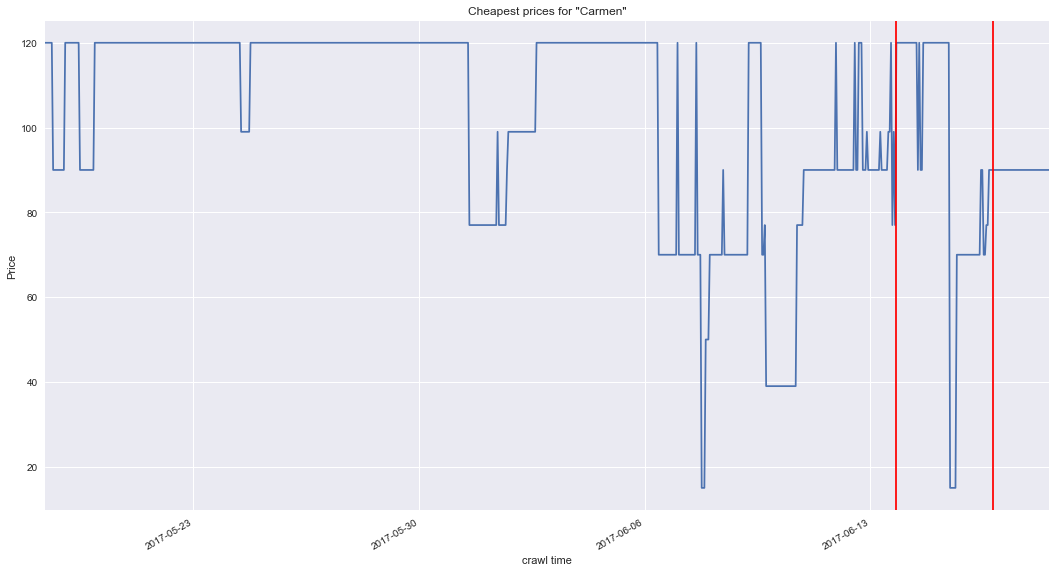

[01] opera | eugène onéguine, Piotr Ilyitch Tchaikovski, bastille (2017-05-16 to 2017-06-14, 9 perfs)
     Cats: Cat1,Cat10,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Optima
     Performances:
       [001] Fri, 2017-05-19 19:30:00
       [008] Mon, 2017-05-22 19:30:00
       [007] Thu, 2017-05-25 19:30:00
       [009] Sun, 2017-05-28 14:30:00
       [002] Wed, 2017-05-31 19:30:00
       [003] Sat, 2017-06-03 19:30:00
       [004] Tue, 2017-06-06 19:30:00
       [005] Sun, 2017-06-11 14:30:00
       [006] Wed, 2017-06-14 19:30:00


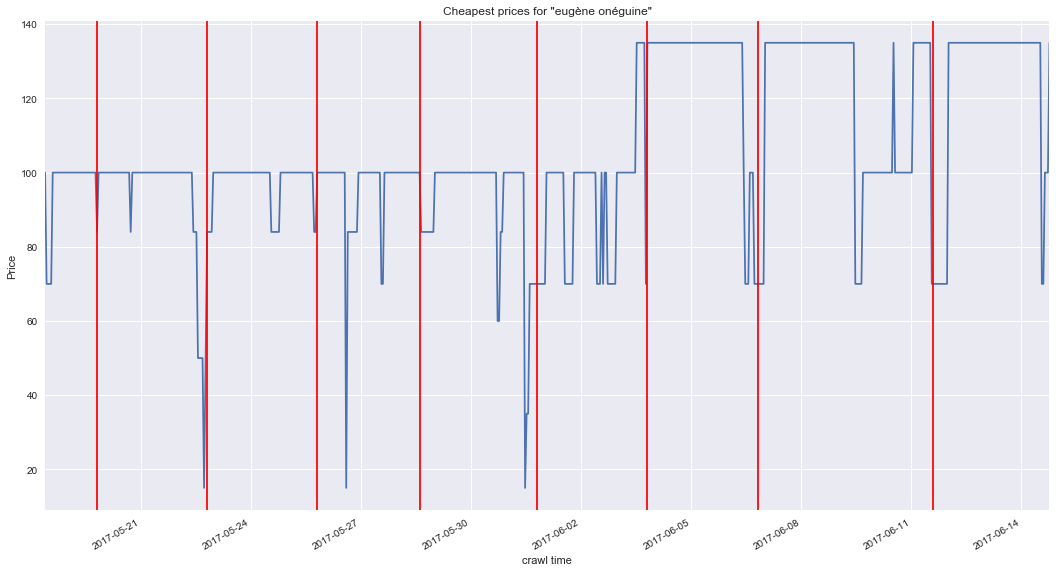

[07] opera | La cenerentola, Gioacchino Rossini, garnier (2017-06-10 to 2017-07-13, 12 perfs)
     Cats: Cat1,Cat2,Cat3,Cat4,Optima
     Performances:
       [047] Sat, 2017-06-10 19:30:00
       [052] Wed, 2017-06-14 19:30:00
       [057] Sat, 2017-06-17 19:30:00
       [062] Tue, 2017-06-20 19:30:00
       [048] Fri, 2017-06-23 19:30:00
       [049] Sun, 2017-06-25 14:30:00
       [050] Fri, 2017-06-30 19:30:00
       [051] Sun, 2017-07-02 19:30:00
       [072] Thu, 2017-07-06 19:30:00
       [053] Sat, 2017-07-08 19:30:00
       [054] Tue, 2017-07-11 19:30:00
       [055] Thu, 2017-07-13 19:30:00


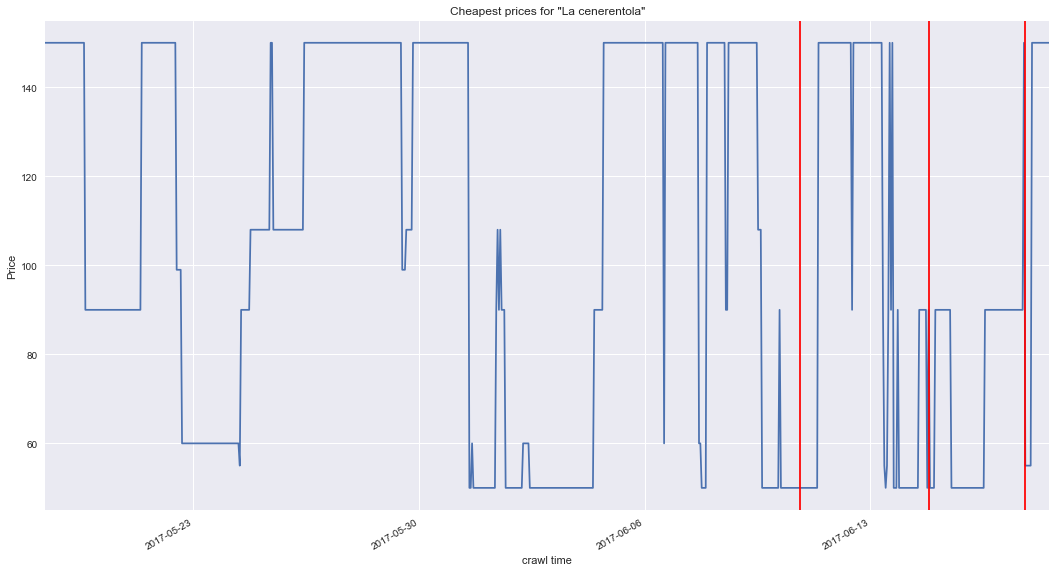

In [47]:
plot_cheapest(data, 2)
plot_cheapest(data, 21)
plot_cheapest(data, 1)
plot_cheapest(data, 7)

[20] opera | la veuve joyeuse, Franz Lehár, bastille (2017-09-09 to 2017-10-21, 15 perfs)
     Cats: Cat1,Cat10,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Optima
     Performances:
       [209] Sat, 2017-09-09 19:30:00
       [189] Tue, 2017-09-12 19:30:00
       [191] Thu, 2017-09-14 19:30:00 - Closed abruptly at 2017-05-30 14:28:00
       [190] Sat, 2017-09-16 19:30:00
       [215] Wed, 2017-09-20 19:30:00
       [211] Fri, 2017-09-22 19:30:00
       [192] Sun, 2017-09-24 14:30:00
       [193] Thu, 2017-09-28 19:30:00
       [206] Sat, 2017-09-30 19:30:00
       [194] Thu, 2017-10-05 19:30:00
       [195] Mon, 2017-10-09 19:30:00
       [196] Wed, 2017-10-11 19:30:00
       [197] Sun, 2017-10-15 14:30:00
       [198] Wed, 2017-10-18 19:30:00
       [199] Sat, 2017-10-21 19:30:00


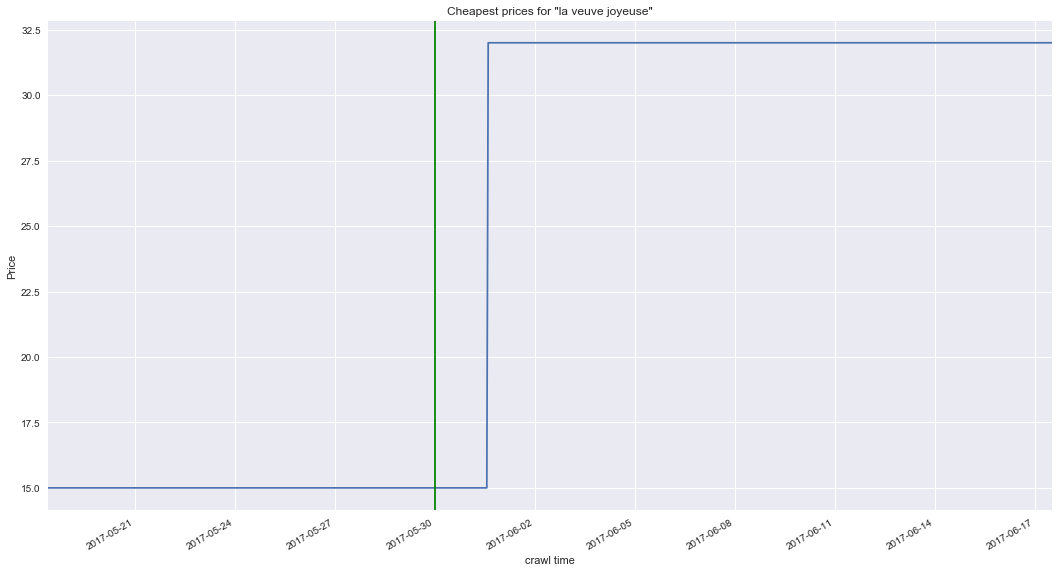

[09] opera | così fan tutte, Wolfgang Amadeus Mozart, garnier (2017-09-12 to 2017-10-21, 14 perfs)
     Cats: Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Optima
     Performances:
       [065] Tue, 2017-09-12 19:30:00
       [066] Sat, 2017-09-16 19:30:00
       [067] Mon, 2017-09-18 19:30:00
       [068] Wed, 2017-09-20 19:30:00
       [069] Mon, 2017-09-25 19:30:00
       [070] Thu, 2017-09-28 19:30:00
       [071] Sat, 2017-09-30 19:30:00
       [092] Tue, 2017-10-03 19:30:00
       [073] Thu, 2017-10-05 19:30:00
       [074] Sun, 2017-10-08 14:30:00
       [075] Tue, 2017-10-10 19:30:00
       [076] Sat, 2017-10-14 19:30:00
       [097] Tue, 2017-10-17 19:30:00 - Closed abruptly at 2017-05-30 14:28:00
       [078] Sat, 2017-10-21 19:30:00


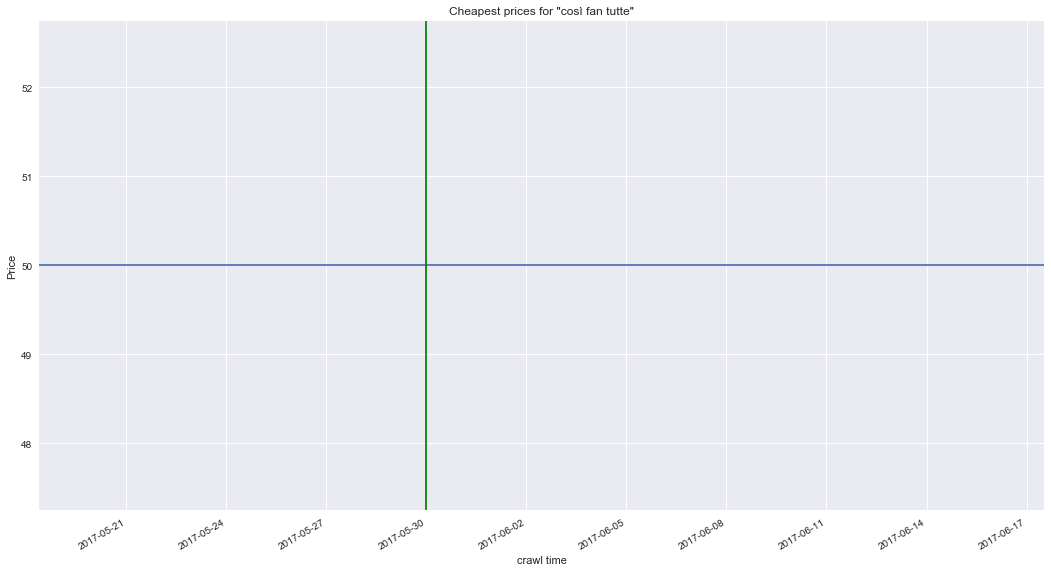

[05] opera | pelléas et mélisande, Claude Debussy, bastille (2017-09-19 to 2017-10-06, 5 perfs)
     Cats: Cat1,Cat10,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Optima
     Performances:
       [031] Tue, 2017-09-19 19:30:00
       [044] Sat, 2017-09-23 19:30:00
       [033] Wed, 2017-09-27 19:30:00
       [034] Sun, 2017-10-01 14:30:00
       [035] Fri, 2017-10-06 19:30:00


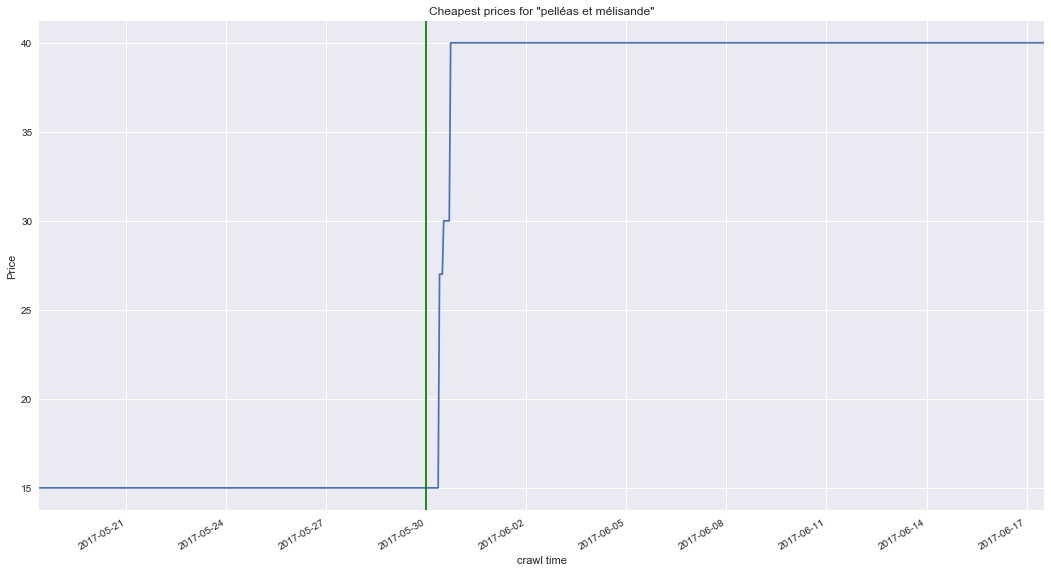

[19] opera | Don carlos, Giuseppe Verdi, bastille (2017-10-10 to 2017-11-11, 11 perfs)
     Cats: Cat1,Cat10,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Optima
     Performances:
       [188] Tue, 2017-10-10 18:00:00
       [187] Fri, 2017-10-13 18:00:00
       [178] Mon, 2017-10-16 18:00:00
       [179] Thu, 2017-10-19 18:00:00
       [180] Sun, 2017-10-22 14:00:00
       [181] Wed, 2017-10-25 18:00:00
       [182] Sat, 2017-10-28 18:00:00
       [183] Tue, 2017-10-31 18:00:00
       [184] Sun, 2017-11-05 14:00:00
       [185] Wed, 2017-11-08 18:00:00
       [186] Sat, 2017-11-11 18:00:00


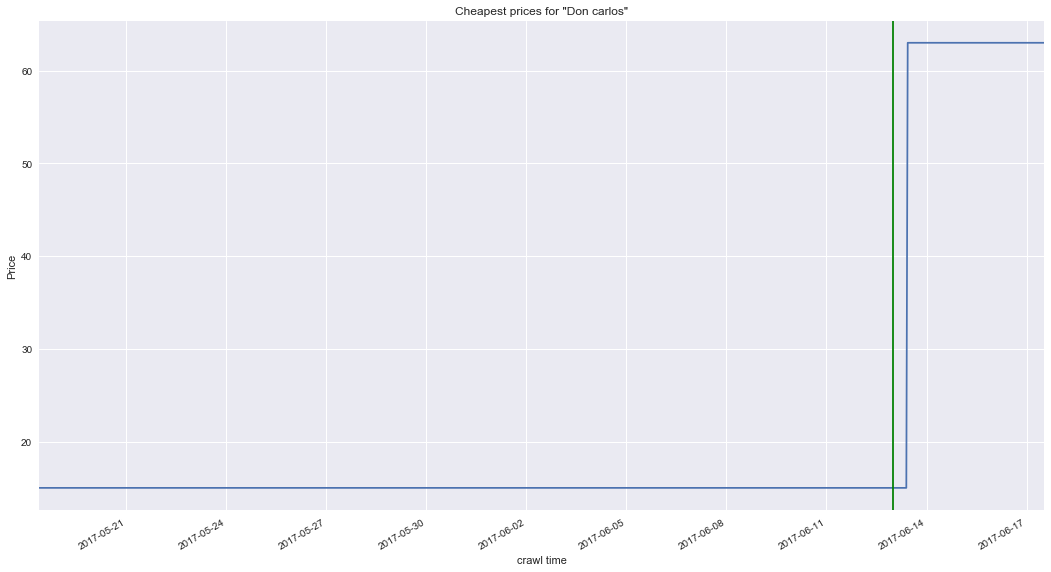

In [41]:
plot_cheapest(data, 20)
plot_cheapest(data, 9)
plot_cheapest(data, 5)
plot_cheapest(data, 19)